# Task 1:
## Implement the Adam (Mini-Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.metrics import r2_score

In [2]:
data = np.genfromtxt('MultiVarLR.csv', delimiter = ',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [3]:
X = data[:,:-1]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [4]:
y = data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [5]:
def calc_mse(error):
    mse = np.linalg.norm(error, 2)
    mse = np.square(mse)
    mse = mse/(X.shape[0]*2)
    return mse

In [6]:
def plots(X, y, finalPred, preds,losses, thetas, alpha, figsize=(6, 30)):
    fig, axes = plt.subplots(1+thetas.shape[1], 1, figsize=figsize)
    axes = axes.flatten()
    
    axes[0].plot(losses, '*-');
    axes[0].set_xlabel('Epochs');
    axes[0].set_ylabel('Loss');
    axes[0].grid()
    
    for i in range (thetas.shape[1]):
        axes[i+1].plot(thetas[:,i], losses, 'o-');
        label = 'Theta '+ str(i)
        axes[i+1].set_xlabel(label);
        axes[i+1].set_ylabel('Loss');
        axes[i+1].set_title(f'Learning Rate = {alpha}')
        axes[i+1].grid()
      


In [9]:
def MiniBatch_Adam(X,y,learningRate = 0.01, epsilon = 0.00000001, beta1 = 0.9, beta2 = 0.99, batchSize = 1, epochs = 1000):
    
    # ---------- Setting up the ones in the input ----------
    
    if len(X.shape) == 1:                    # Single variable 
        X = X.reshape(-1,1)
    variables = X.shape[1]
    ones = np.ones(shape = X.shape[0])
    ones = ones.reshape(-1,1)
    X = np.append(X,ones, axis = 1)
    originalData = X
    theta = np.random.uniform(low = 0, high = 0.001, size = (1,variables+1))     # Setting up the weigghts
    
    batches = ceil(X.shape[0] / batchSize)
    
    '''
        Next lists will be used to plot training history and final results
    '''
    loss = []
    lines = []
    theta_history = []
    
    Vt = np.zeros((1,variables+1))         # commulated gradient
    Mt = np.zeros((1,variables+1))         # Momentum
    idx = np.arange(X.shape[0])
    for i in range(epochs):
        np.random.shuffle(idx)
        X,y = X[idx], y[idx]
        print('********** Epoch ', i+1, '**********')
        for batchNum, j in enumerate(range(0, X.shape[0],batchSize)):
            print('---------- Batch ',batchNum+1, '----------')
            prediction = theta@X[j:j+batchSize].T                   
            error = prediction - y[j:j+batchSize]                  
            mse = calc_mse(error)
            loss.append(mse)
            print("MSE: ",mse)
            print()
            m = batchSize
            gradients = (1/m)*error@X[j:j+batchSize]
            gradients = np.array(gradients).reshape(1,variables+1)

            Mt = beta1*Mt + (1-beta1)*(gradients)                              # The Momentum of gradients
            Vt = beta2*Vt + (1-beta2)*(gradients**2)                           # The commulated gradients
            
            t = (batches*i) + batchNum + 1                                     # Number of iteratinos, used in Bias correction
            Mt = Mt/(1-beta1**t)                                               # Bias correction
            Vt = Vt/(1-beta2**t)                                               # Bias correction
            
            step = learningRate/(np.sqrt(Vt)+epsilon)
            step *= Mt
            
            theta_history.append( list(theta)[0])                           # To plot weights vs loss 
            theta = theta - step
            
        prediction = theta@originalData.T  
        prediction = prediction.reshape( originalData.shape[0],)
        lines.append( list(prediction))                                     # To plot all regression lines
            
        '''
            I'll add an exploding gradient check
            And later I'll add all optimizers in one function 
        '''   
        
            
        if(np.linalg.norm(gradients,2) < 0.01):                             # Gradient check
            print("Gradients almost reached Zero ")
            break
            
        if i > 0:                                                           # Check that its not the first iteration
            if abs(loss[-1] - loss[i*(X.shape[0] // batchSize)-1]) < 0.001:                # Convergence check
                print('Loss is not changing, it might be oscillating !')
                break

        
    theta_history = np.array(theta_history)
    lines = np.array(lines)
    prediction = theta@originalData.T  
    prediction = prediction.reshape( originalData.shape[0], )
    history = {'weights':theta_history, 'loss':loss, 'preds':lines}
    final_prediction = {'weights':theta, 'pred':prediction}    
    
    return [history, final_prediction]

In [10]:
trainHistory, finalPred = MiniBatch_Adam(X,y, learningRate = 0.001, \
                          epsilon = 0.0000001, beta1 = 0.7, \
                          beta2 = 0.7, batchSize = 5 , epochs = 700)

********** Epoch  1 **********
---------- Batch  1 ----------
MSE:  2454.7976613793794

---------- Batch  2 ----------
MSE:  2910.0644462965693

---------- Batch  3 ----------
MSE:  2932.6204836329734

---------- Batch  4 ----------
MSE:  3020.158494244137

---------- Batch  5 ----------
MSE:  1969.9197763610553

********** Epoch  2 **********
---------- Batch  1 ----------
MSE:  3026.7248476803916

---------- Batch  2 ----------
MSE:  2539.815367327512

---------- Batch  3 ----------
MSE:  2607.218192601188

---------- Batch  4 ----------
MSE:  2400.7094100735844

---------- Batch  5 ----------
MSE:  2415.2793233116663

********** Epoch  3 **********
---------- Batch  1 ----------
MSE:  2526.9564930632077

---------- Batch  2 ----------
MSE:  3257.302290255492

---------- Batch  3 ----------
MSE:  2813.36818179687

---------- Batch  4 ----------
MSE:  2245.1612037314444

---------- Batch  5 ----------
MSE:  1902.0282160170473

********** Epoch  4 **********
---------- Batch  1 -------

---------- Batch  3 ----------
MSE:  0.6735192910642941

---------- Batch  4 ----------
MSE:  0.544499057461342

---------- Batch  5 ----------
MSE:  2.772619812457607

********** Epoch  230 **********
---------- Batch  1 ----------
MSE:  0.740232232129292

---------- Batch  2 ----------
MSE:  2.0850178565647006

---------- Batch  3 ----------
MSE:  0.47128397306679093

---------- Batch  4 ----------
MSE:  0.9625308909702681

---------- Batch  5 ----------
MSE:  1.4539888238209497

********** Epoch  231 **********
---------- Batch  1 ----------
MSE:  0.35607932538439896

---------- Batch  2 ----------
MSE:  0.7187981031527866

---------- Batch  3 ----------
MSE:  1.293195773290546

---------- Batch  4 ----------
MSE:  1.2373399612940514

---------- Batch  5 ----------
MSE:  1.9955498231946418

********** Epoch  232 **********
---------- Batch  1 ----------
MSE:  1.0554893535040955

---------- Batch  2 ----------
MSE:  0.663072882994879

---------- Batch  3 ----------
MSE:  2.4211511167

********** Epoch  424 **********
---------- Batch  1 ----------
MSE:  0.9664871265949031

---------- Batch  2 ----------
MSE:  0.590771157739297

---------- Batch  3 ----------
MSE:  0.7868769601317692

---------- Batch  4 ----------
MSE:  0.4923243987496599

---------- Batch  5 ----------
MSE:  2.1349110460174363

********** Epoch  425 **********
---------- Batch  1 ----------
MSE:  0.8483406039400231

---------- Batch  2 ----------
MSE:  0.8223779036230151

---------- Batch  3 ----------
MSE:  2.215818341174593

---------- Batch  4 ----------
MSE:  0.4149756469598897

---------- Batch  5 ----------
MSE:  0.6180779247062255

********** Epoch  426 **********
---------- Batch  1 ----------
MSE:  0.7966745234999061

---------- Batch  2 ----------
MSE:  0.8392124678826269

---------- Batch  3 ----------
MSE:  0.9569560688987911

---------- Batch  4 ----------
MSE:  0.7521905521294348

---------- Batch  5 ----------
MSE:  1.6489180051605725

********** Epoch  427 **********
---------- Batc

---------- Batch  3 ----------
MSE:  1.868652018878262

---------- Batch  4 ----------
MSE:  1.0407714026354156

---------- Batch  5 ----------
MSE:  0.5428066650293294

********** Epoch  599 **********
---------- Batch  1 ----------
MSE:  0.5627845619295527

---------- Batch  2 ----------
MSE:  2.2830623978510562

---------- Batch  3 ----------
MSE:  0.3592503814481923

---------- Batch  4 ----------
MSE:  0.5393683718131043

---------- Batch  5 ----------
MSE:  0.682764867125298

********** Epoch  600 **********
---------- Batch  1 ----------
MSE:  0.265297706553296

---------- Batch  2 ----------
MSE:  0.5391278549164541

---------- Batch  3 ----------
MSE:  1.8354112965178708

---------- Batch  4 ----------
MSE:  1.279938157276321

---------- Batch  5 ----------
MSE:  0.5116968276783109

********** Epoch  601 **********
---------- Batch  1 ----------
MSE:  0.5022867698311557

---------- Batch  2 ----------
MSE:  0.6133322540187222

---------- Batch  3 ----------
MSE:  1.73755873295

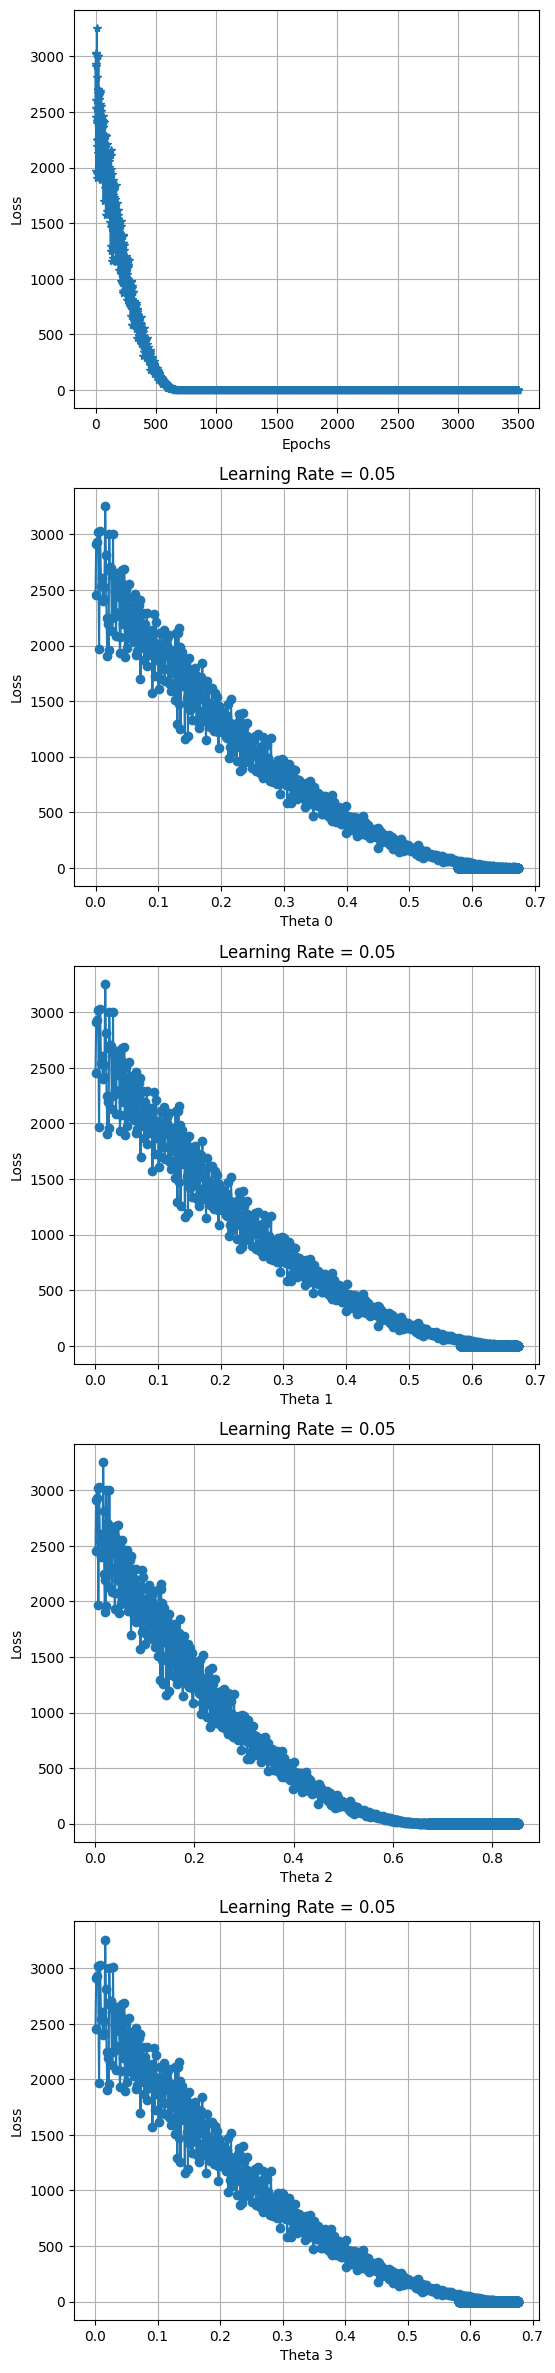

In [11]:
plots(X,y,finalPred['pred'], trainHistory['preds'], trainHistory['loss'], \
      trainHistory['weights'], 0.05)

In [12]:
r2_score(y, finalPred['pred'])

0.9850215328382543

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

In [22]:
def MiniBatch_BFGS(X,y,learningRate = 0.01, epsilon = 0.001, batchSize = 1, epochs = 1000):
    
    # ---------- Setting up the ones in the input ----------
    
    if len(X.shape) == 1:                    # Single variable 
        X = X.reshape(-1,1)
    variables = X.shape[1]
    ones = np.ones(shape = X.shape[0])
    ones = ones.reshape(-1,1)
    X = np.append(X,ones, axis = 1)
    originalData = X
    
    theta = np.random.uniform(low = 0, high = 0.001, size = (1,variables+1))     # Setting up the weigghts
    B_inverse = np.identity(theta.shape[1])
    I = np.identity(theta.shape[1])
    
    batches = ceil(X.shape[0] / batchSize)
    
    '''
        Next lists will be used to plot training history and final results
    '''
    loss = []
    lines = []
    theta_history = []
    

    idx = np.arange(X.shape[0])
    for i in range(epochs):
        np.random.shuffle(idx)
        X,y = X[idx], y[idx]
        print('********** Epoch ', i+1, '**********')
        for batchNum, j in enumerate(range(0, X.shape[0],batchSize)):
            print('---------- Batch ',batchNum+1, '----------')
            prediction = theta@X[j:j+batchSize].T     
            error = prediction - y[j:j+batchSize]                  
            mse = calc_mse(error)
            loss.append(mse)
            print("MSE: ",mse)
            print()
            m = batchSize
            gradients = (1/m)*error@X[j:j+batchSize]
            gradients = np.array(gradients).reshape(1,variables+1)

            step = learningRate * gradients @ B_inverse.T                              # Updating weights
            
            theta_history.append( list(theta)[0])                           # To plot weights vs loss 
            theta_old = theta                                               # Will be used in updating B
            theta = theta - step
            
            '''
            Updating B
            '''
            new_pred = theta@X[j:j+batchSize].T                   
            new_error = new_pred - y[j:j+batchSize]                  

            new_gradients = (1/m)*new_error@X[j:j+batchSize]
            new_gradients = np.array(new_gradients).reshape(1,variables+1)
            
            delta_grads = new_gradients - gradients
            delta_theta = theta - theta_old
            
            B_inverse = ( I - ( (delta_theta.T@delta_grads)/(delta_grads@delta_theta.T))  ) @ B_inverse @ (I - (delta_grads.T@delta_theta)/(delta_grads@delta_theta.T))\
                + ( (delta_theta.T@delta_theta)/(delta_grads@delta_theta.T))
        
            
        
            
        prediction = theta@originalData.T  
        prediction = prediction.reshape( originalData.shape[0],)
        lines.append( list(prediction))                                     # To plot all regression lines
            
        '''
            I'll add an exploding gradient check
            And later I'll add all optimizers in one function 
        '''   
        
            
        if(np.linalg.norm(gradients,2) < epsilon):                             # Gradient check
            print("Gradients almost reached Zero ")
            break
            
        if i > 0:                                                           # Check that its not the first iteration
            if abs(loss[-1] - loss[i*(X.shape[0] // batchSize)-1]) < 0.001:                # Convergence check
                print('Loss is not changing, it might be oscillating !')
                break

        
    theta_history = np.array(theta_history)
    lines = np.array(lines)
    prediction = theta@originalData.T  
    prediction = prediction.reshape( originalData.shape[0], )
    history = {'weights':theta_history, 'loss':loss, 'preds':lines}
    final_prediction = {'weights':theta, 'pred':prediction}    
    
    return [history, final_prediction]

In [23]:
trainHistory, finalPred = MiniBatch_BFGS(X,y,learningRate = 0.001, epsilon = 0.001, batchSize = X.shape[0], epochs = 10000)

********** Epoch  1 **********
---------- Batch  1 ----------
MSE:  13383.209246696606

********** Epoch  2 **********
---------- Batch  1 ----------
MSE:  4626722.817962303

********** Epoch  3 **********
---------- Batch  1 ----------
MSE:  4617473.901825411

********** Epoch  4 **********
---------- Batch  1 ----------
MSE:  4608202.863908741

********** Epoch  5 **********
---------- Batch  1 ----------
MSE:  4584489.158595445

********** Epoch  6 **********
---------- Batch  1 ----------
MSE:  4571425.771749087

********** Epoch  7 **********
---------- Batch  1 ----------
MSE:  4554928.050719479

********** Epoch  8 **********
---------- Batch  1 ----------
MSE:  4540202.758468311

********** Epoch  9 **********
---------- Batch  1 ----------
MSE:  4531079.016813343

********** Epoch  10 **********
---------- Batch  1 ----------
MSE:  4522021.040960879

********** Epoch  11 **********
---------- Batch  1 ----------
MSE:  4512981.524286478

********** Epoch  12 **********
--------

********** Epoch  424 **********
---------- Batch  1 ----------
MSE:  1974954.9145132843

********** Epoch  425 **********
---------- Batch  1 ----------
MSE:  1971006.985374111

********** Epoch  426 **********
---------- Batch  1 ----------
MSE:  1967066.948145287

********** Epoch  427 **********
---------- Batch  1 ----------
MSE:  1963134.7870508826

********** Epoch  428 **********
---------- Batch  1 ----------
MSE:  1959210.4863465067

********** Epoch  429 **********
---------- Batch  1 ----------
MSE:  1955294.0303192374

********** Epoch  430 **********
---------- Batch  1 ----------
MSE:  1951385.4032875684

********** Epoch  431 **********
---------- Batch  1 ----------
MSE:  1947484.5896013358

********** Epoch  432 **********
---------- Batch  1 ----------
MSE:  1943591.5736416613

********** Epoch  433 **********
---------- Batch  1 ----------
MSE:  1939706.3398208898

********** Epoch  434 **********
---------- Batch  1 ----------
MSE:  1935828.8725825257

********** E

********** Epoch  821 **********
---------- Batch  1 ----------
MSE:  892391.8647091985

********** Epoch  822 **********
---------- Batch  1 ----------
MSE:  890607.979106583

********** Epoch  823 **********
---------- Batch  1 ----------
MSE:  888827.6594912872

********** Epoch  824 **********
---------- Batch  1 ----------
MSE:  887050.8987349021

********** Epoch  825 **********
---------- Batch  1 ----------
MSE:  885277.6897232691

********** Epoch  826 **********
---------- Batch  1 ----------
MSE:  883508.0253564507

********** Epoch  827 **********
---------- Batch  1 ----------
MSE:  881741.8985487013

********** Epoch  828 **********
---------- Batch  1 ----------
MSE:  879979.302228441

********** Epoch  829 **********
---------- Batch  1 ----------
MSE:  878220.2293382244

********** Epoch  830 **********
---------- Batch  1 ----------
MSE:  876464.672834716

********** Epoch  831 **********
---------- Batch  1 ----------
MSE:  874712.6256886575

********** Epoch  832 **

********** Epoch  1215 **********
---------- Batch  1 ----------
MSE:  405659.8257659152

********** Epoch  1216 **********
---------- Batch  1 ----------
MSE:  404848.91750914766

********** Epoch  1217 **********
---------- Batch  1 ----------
MSE:  404039.630257985

********** Epoch  1218 **********
---------- Batch  1 ----------
MSE:  403231.9607720377

********** Epoch  1219 **********
---------- Batch  1 ----------
MSE:  402425.9058173924

********** Epoch  1220 **********
---------- Batch  1 ----------
MSE:  401621.46216660173

********** Epoch  1221 **********
---------- Batch  1 ----------
MSE:  400818.6265986689

********** Epoch  1222 **********
---------- Batch  1 ----------
MSE:  400017.39589903614

********** Epoch  1223 **********
---------- Batch  1 ----------
MSE:  399217.7668595723

********** Epoch  1224 **********
---------- Batch  1 ----------
MSE:  398419.73627855844

********** Epoch  1225 **********
---------- Batch  1 ----------
MSE:  397623.30096067605

******

********** Epoch  1637 **********
---------- Batch  1 ----------
MSE:  174356.4978519839

********** Epoch  1638 **********
---------- Batch  1 ----------
MSE:  174007.96494771607

********** Epoch  1639 **********
---------- Batch  1 ----------
MSE:  173660.1287607238

********** Epoch  1640 **********
---------- Batch  1 ----------
MSE:  173312.9878982694

********** Epoch  1641 **********
---------- Batch  1 ----------
MSE:  172966.54097039902

********** Epoch  1642 **********
---------- Batch  1 ----------
MSE:  172620.78658993743

********** Epoch  1643 **********
---------- Batch  1 ----------
MSE:  172275.7233724824

********** Epoch  1644 **********
---------- Batch  1 ----------
MSE:  171931.34993639903

********** Epoch  1645 **********
---------- Batch  1 ----------
MSE:  171587.66490281443

********** Epoch  1646 **********
---------- Batch  1 ----------
MSE:  171244.66689561203

********** Epoch  1647 **********
---------- Batch  1 ----------
MSE:  170902.35454142586

***

********** Epoch  1987 **********
---------- Batch  1 ----------
MSE:  86554.00028669449

********** Epoch  1988 **********
---------- Batch  1 ----------
MSE:  86380.98457505964

********** Epoch  1989 **********
---------- Batch  1 ----------
MSE:  86208.31472183227

********** Epoch  1990 **********
---------- Batch  1 ----------
MSE:  86035.99003564162

********** Epoch  1991 **********
---------- Batch  1 ----------
MSE:  85864.00982649859

********** Epoch  1992 **********
---------- Batch  1 ----------
MSE:  85692.37340579364

********** Epoch  1993 **********
---------- Batch  1 ----------
MSE:  85521.08008629367

********** Epoch  1994 **********
---------- Batch  1 ----------
MSE:  85350.12918213947

********** Epoch  1995 **********
---------- Batch  1 ----------
MSE:  85179.52000884258

********** Epoch  1996 **********
---------- Batch  1 ----------
MSE:  85009.25188328314

********** Epoch  1997 **********
---------- Batch  1 ----------
MSE:  84839.32412370667

**********

********** Epoch  2304 **********
---------- Batch  1 ----------
MSE:  45900.71280152606

********** Epoch  2305 **********
---------- Batch  1 ----------
MSE:  45808.96301157404

********** Epoch  2306 **********
---------- Batch  1 ----------
MSE:  45717.39662945213

********** Epoch  2307 **********
---------- Batch  1 ----------
MSE:  45626.01328852809

********** Epoch  2308 **********
---------- Batch  1 ----------
MSE:  45534.81262290257

********** Epoch  2309 **********
---------- Batch  1 ----------
MSE:  45443.79426740764

********** Epoch  2310 **********
---------- Batch  1 ----------
MSE:  45352.95785760535

********** Epoch  2311 **********
---------- Batch  1 ----------
MSE:  45262.30302978624

********** Epoch  2312 **********
---------- Batch  1 ----------
MSE:  45171.82942096796

********** Epoch  2313 **********
---------- Batch  1 ----------
MSE:  45081.536668893685

********** Epoch  2314 **********
---------- Batch  1 ----------
MSE:  44991.424412030814

********

********** Epoch  2658 **********
---------- Batch  1 ----------
MSE:  22605.445441550306

********** Epoch  2659 **********
---------- Batch  1 ----------
MSE:  22560.26289105089

********** Epoch  2660 **********
---------- Batch  1 ----------
MSE:  22515.170660469914

********** Epoch  2661 **********
---------- Batch  1 ----------
MSE:  22470.16856925788

********** Epoch  2662 **********
---------- Batch  1 ----------
MSE:  22425.25643722617

********** Epoch  2663 **********
---------- Batch  1 ----------
MSE:  22380.434084546407

********** Epoch  2664 **********
---------- Batch  1 ----------
MSE:  22335.701331749646

********** Epoch  2665 **********
---------- Batch  1 ----------
MSE:  22291.057999725715

********** Epoch  2666 **********
---------- Batch  1 ----------
MSE:  22246.503909722473

********** Epoch  2667 **********
---------- Batch  1 ----------
MSE:  22202.038883345187

********** Epoch  2668 **********
---------- Batch  1 ----------
MSE:  22157.66274255563

***

********** Epoch  2916 **********
---------- Batch  1 ----------
MSE:  13490.940828478888

********** Epoch  2917 **********
---------- Batch  1 ----------
MSE:  13463.978172701001

********** Epoch  2918 **********
---------- Batch  1 ----------
MSE:  13437.069415272017

********** Epoch  2919 **********
---------- Batch  1 ----------
MSE:  13410.214448449125

********** Epoch  2920 **********
---------- Batch  1 ----------
MSE:  13383.41316470492

********** Epoch  2921 **********
---------- Batch  1 ----------
MSE:  13356.665456726912

********** Epoch  2922 **********
---------- Batch  1 ----------
MSE:  13329.97121741716

********** Epoch  2923 **********
---------- Batch  1 ----------
MSE:  13303.330339891776

********** Epoch  2924 **********
---------- Batch  1 ----------
MSE:  13276.74271748057

********** Epoch  2925 **********
---------- Batch  1 ----------
MSE:  13250.208243726573

********** Epoch  2926 **********
---------- Batch  1 ----------
MSE:  13223.726812385597

**

********** Epoch  3176 **********
---------- Batch  1 ----------
MSE:  8019.718772478044

********** Epoch  3177 **********
---------- Batch  1 ----------
MSE:  8003.693089590106

********** Epoch  3178 **********
---------- Batch  1 ----------
MSE:  7987.69944204226

********** Epoch  3179 **********
---------- Batch  1 ----------
MSE:  7971.737765795854

********** Epoch  3180 **********
---------- Batch  1 ----------
MSE:  7955.807996940278

********** Epoch  3181 **********
---------- Batch  1 ----------
MSE:  7939.9100716926305

********** Epoch  3182 **********
---------- Batch  1 ----------
MSE:  7924.043926397558

********** Epoch  3183 **********
---------- Batch  1 ----------
MSE:  7908.209497526932

********** Epoch  3184 **********
---------- Batch  1 ----------
MSE:  7892.406721679615

********** Epoch  3185 **********
---------- Batch  1 ----------
MSE:  7876.635535581219

********** Epoch  3186 **********
---------- Batch  1 ----------
MSE:  7860.895876083834

**********

********** Epoch  3511 **********
---------- Batch  1 ----------
MSE:  4103.784794490528

********** Epoch  3512 **********
---------- Batch  1 ----------
MSE:  4095.587063624586

********** Epoch  3513 **********
---------- Batch  1 ----------
MSE:  4087.4057200226407

********** Epoch  3514 **********
---------- Batch  1 ----------
MSE:  4079.240730926557

********** Epoch  3515 **********
---------- Batch  1 ----------
MSE:  4071.092063643675

********** Epoch  3516 **********
---------- Batch  1 ----------
MSE:  4062.9596855466934

********** Epoch  3517 **********
---------- Batch  1 ----------
MSE:  4054.8435640735247

********** Epoch  3518 **********
---------- Batch  1 ----------
MSE:  4046.7436667271813

********** Epoch  3519 **********
---------- Batch  1 ----------
MSE:  4038.6599610756357

********** Epoch  3520 **********
---------- Batch  1 ----------
MSE:  4030.5924147516835

********** Epoch  3521 **********
---------- Batch  1 ----------
MSE:  4022.540995452838

****

********** Epoch  3834 **********
---------- Batch  1 ----------
MSE:  2151.6207162194023

********** Epoch  3835 **********
---------- Batch  1 ----------
MSE:  2147.3253613459187

********** Epoch  3836 **********
---------- Batch  1 ----------
MSE:  2143.0385928868295

********** Epoch  3837 **********
---------- Batch  1 ----------
MSE:  2138.76039367789

********** Epoch  3838 **********
---------- Batch  1 ----------
MSE:  2134.4907465891692

********** Epoch  3839 **********
---------- Batch  1 ----------
MSE:  2130.2296345249774

********** Epoch  3840 **********
---------- Batch  1 ----------
MSE:  2125.977040423802

********** Epoch  3841 **********
---------- Batch  1 ----------
MSE:  2121.732947258237

********** Epoch  3842 **********
---------- Batch  1 ----------
MSE:  2117.4973380349065

********** Epoch  3843 **********
---------- Batch  1 ----------
MSE:  2113.270195794417

********** Epoch  3844 **********
---------- Batch  1 ----------
MSE:  2109.051503611264

*****

********** Epoch  4214 **********
---------- Batch  1 ----------
MSE:  1007.385942548311

********** Epoch  4215 **********
---------- Batch  1 ----------
MSE:  1005.3779129873972

********** Epoch  4216 **********
---------- Batch  1 ----------
MSE:  1003.3738974775758

********** Epoch  4217 **********
---------- Batch  1 ----------
MSE:  1001.3738879947605

********** Epoch  4218 **********
---------- Batch  1 ----------
MSE:  999.3778765308982

********** Epoch  4219 **********
---------- Batch  1 ----------
MSE:  997.3858550939545

********** Epoch  4220 **********
---------- Batch  1 ----------
MSE:  995.3978157078622

********** Epoch  4221 **********
---------- Batch  1 ----------
MSE:  993.4137504125025

********** Epoch  4222 **********
---------- Batch  1 ----------
MSE:  991.433651263669

********** Epoch  4223 **********
---------- Batch  1 ----------
MSE:  989.4575103330338

********** Epoch  4224 **********
---------- Batch  1 ----------
MSE:  987.485319708118

*********

********** Epoch  4518 **********
---------- Batch  1 ----------
MSE:  549.6004698674783

********** Epoch  4519 **********
---------- Batch  1 ----------
MSE:  548.5075534664539

********** Epoch  4520 **********
---------- Batch  1 ----------
MSE:  547.4168218053148

********** Epoch  4521 **********
---------- Batch  1 ----------
MSE:  546.3282705167666

********** Epoch  4522 **********
---------- Batch  1 ----------
MSE:  545.2418952422438

********** Epoch  4523 **********
---------- Batch  1 ----------
MSE:  544.1576916318954

********** Epoch  4524 **********
---------- Batch  1 ----------
MSE:  543.0756553445633

********** Epoch  4525 **********
---------- Batch  1 ----------
MSE:  541.99578204777

********** Epoch  4526 **********
---------- Batch  1 ----------
MSE:  540.9180674176973

********** Epoch  4527 **********
---------- Batch  1 ----------
MSE:  539.8425071391694

********** Epoch  4528 **********
---------- Batch  1 ----------
MSE:  538.7690969056385

********** E

********** Epoch  4779 **********
---------- Batch  1 ----------
MSE:  327.1779051276097

********** Epoch  4780 **********
---------- Batch  1 ----------
MSE:  326.5296114335001

********** Epoch  4781 **********
---------- Batch  1 ----------
MSE:  325.88261367848526

********** Epoch  4782 **********
---------- Batch  1 ----------
MSE:  325.2369092719821

********** Epoch  4783 **********
---------- Batch  1 ----------
MSE:  324.5924956285882

********** Epoch  4784 **********
---------- Batch  1 ----------
MSE:  323.9493701680675

********** Epoch  4785 **********
---------- Batch  1 ----------
MSE:  323.3075303153422

********** Epoch  4786 **********
---------- Batch  1 ----------
MSE:  322.6669735004823

********** Epoch  4787 **********
---------- Batch  1 ----------
MSE:  322.027697158696

********** Epoch  4788 **********
---------- Batch  1 ----------
MSE:  321.3896987303159

********** Epoch  4789 **********
---------- Batch  1 ----------
MSE:  320.75297566079496

*********

********** Epoch  5084 **********
---------- Batch  1 ----------
MSE:  179.028708623965

********** Epoch  5085 **********
---------- Batch  1 ----------
MSE:  178.67656517366657

********** Epoch  5086 **********
---------- Batch  1 ----------
MSE:  178.32512565812485

********** Epoch  5087 **********
---------- Batch  1 ----------
MSE:  177.97438867017456

********** Epoch  5088 **********
---------- Batch  1 ----------
MSE:  177.62435280546376

********** Epoch  5089 **********
---------- Batch  1 ----------
MSE:  177.27501666244595

********** Epoch  5090 **********
---------- Batch  1 ----------
MSE:  176.9263788423781

********** Epoch  5091 **********
---------- Batch  1 ----------
MSE:  176.57843794931267

********** Epoch  5092 **********
---------- Batch  1 ----------
MSE:  176.23119259009266

********** Epoch  5093 **********
---------- Batch  1 ----------
MSE:  175.88464137434562

********** Epoch  5094 **********
---------- Batch  1 ----------
MSE:  175.5387829144788

***

********** Epoch  5399 **********
---------- Batch  1 ----------
MSE:  96.66060265348978

********** Epoch  5400 **********
---------- Batch  1 ----------
MSE:  96.4731130470258

********** Epoch  5401 **********
---------- Batch  1 ----------
MSE:  96.28599823228564

********** Epoch  5402 **********
---------- Batch  1 ----------
MSE:  96.0992574600597

********** Epoch  5403 **********
---------- Batch  1 ----------
MSE:  95.91288998263755

********** Epoch  5404 **********
---------- Batch  1 ----------
MSE:  95.72689505380285

********** Epoch  5405 **********
---------- Batch  1 ----------
MSE:  95.54127192883088

********** Epoch  5406 **********
---------- Batch  1 ----------
MSE:  95.35601986448555

********** Epoch  5407 **********
---------- Batch  1 ----------
MSE:  95.17113811901704

********** Epoch  5408 **********
---------- Batch  1 ----------
MSE:  94.98662595215761

********** Epoch  5409 **********
---------- Batch  1 ----------
MSE:  94.80248262512004

********** E

********** Epoch  5790 **********
---------- Batch  1 ----------
MSE:  45.760893575759354

********** Epoch  5791 **********
---------- Batch  1 ----------
MSE:  45.675152487742146

********** Epoch  5792 **********
---------- Batch  1 ----------
MSE:  45.58958279615955

********** Epoch  5793 **********
---------- Batch  1 ----------
MSE:  45.50418415839063

********** Epoch  5794 **********
---------- Batch  1 ----------
MSE:  45.41895623249863

********** Epoch  5795 **********
---------- Batch  1 ----------
MSE:  45.33389867723021

********** Epoch  5796 **********
---------- Batch  1 ----------
MSE:  45.24901115201504

********** Epoch  5797 **********
---------- Batch  1 ----------
MSE:  45.16429331696279

********** Epoch  5798 **********
---------- Batch  1 ----------
MSE:  45.079744832862744

********** Epoch  5799 **********
---------- Batch  1 ----------
MSE:  44.99536536118232

********** Epoch  5800 **********
---------- Batch  1 ----------
MSE:  44.91115456406576

*******

********** Epoch  6196 **********
---------- Batch  1 ----------
MSE:  21.903892809605523

********** Epoch  6197 **********
---------- Batch  1 ----------
MSE:  21.865841866119712

********** Epoch  6198 **********
---------- Batch  1 ----------
MSE:  21.827866986469818

********** Epoch  6199 **********
---------- Batch  1 ----------
MSE:  21.789968018604526

********** Epoch  6200 **********
---------- Batch  1 ----------
MSE:  21.752144810775874

********** Epoch  6201 **********
---------- Batch  1 ----------
MSE:  21.714397211539648

********** Epoch  6202 **********
---------- Batch  1 ----------
MSE:  21.676725069754426

********** Epoch  6203 **********
---------- Batch  1 ----------
MSE:  21.63912823458049

********** Epoch  6204 **********
---------- Batch  1 ----------
MSE:  21.601606555480153

********** Epoch  6205 **********
---------- Batch  1 ----------
MSE:  21.56415988221626

********** Epoch  6206 **********
---------- Batch  1 ----------
MSE:  21.526788064852255

*

********** Epoch  6518 **********
---------- Batch  1 ----------
MSE:  12.862620712697833

********** Epoch  6519 **********
---------- Batch  1 ----------
MSE:  12.842643272133687

********** Epoch  6520 **********
---------- Batch  1 ----------
MSE:  12.822705766473234

********** Epoch  6521 **********
---------- Batch  1 ----------
MSE:  12.802808115886593

********** Epoch  6522 **********
---------- Batch  1 ----------
MSE:  12.782950240703464

********** Epoch  6523 **********
---------- Batch  1 ----------
MSE:  12.7631320614129

********** Epoch  6524 **********
---------- Batch  1 ----------
MSE:  12.743353498662719

********** Epoch  6525 **********
---------- Batch  1 ----------
MSE:  12.723614473259438

********** Epoch  6526 **********
---------- Batch  1 ----------
MSE:  12.703914906167972

********** Epoch  6527 **********
---------- Batch  1 ----------
MSE:  12.68425471851113

********** Epoch  6528 **********
---------- Batch  1 ----------
MSE:  12.6646338315693

****

********** Epoch  6875 **********
---------- Batch  1 ----------
MSE:  7.7608945394849025

********** Epoch  6876 **********
---------- Batch  1 ----------
MSE:  7.751115449540984

********** Epoch  6877 **********
---------- Batch  1 ----------
MSE:  7.741355907997913

********** Epoch  6878 **********
---------- Batch  1 ----------
MSE:  7.731615875778397

********** Epoch  6879 **********
---------- Batch  1 ----------
MSE:  7.72189531388332

********** Epoch  6880 **********
---------- Batch  1 ----------
MSE:  7.712194183391387

********** Epoch  6881 **********
---------- Batch  1 ----------
MSE:  7.7025124454593605

********** Epoch  6882 **********
---------- Batch  1 ----------
MSE:  7.692850061321422

********** Epoch  6883 **********
---------- Batch  1 ----------
MSE:  7.683206992289449

********** Epoch  6884 **********
---------- Batch  1 ----------
MSE:  7.6735831997524535

********** Epoch  6885 **********
---------- Batch  1 ----------
MSE:  7.663978645176725

********

********** Epoch  7294 **********
---------- Batch  1 ----------
MSE:  4.984168554562807

********** Epoch  7295 **********
---------- Batch  1 ----------
MSE:  4.979940139862828

********** Epoch  7296 **********
---------- Batch  1 ----------
MSE:  4.975720177763791

********** Epoch  7297 **********
---------- Batch  1 ----------
MSE:  4.971508651369028

********** Epoch  7298 **********
---------- Batch  1 ----------
MSE:  4.967305543815519

********** Epoch  7299 **********
---------- Batch  1 ----------
MSE:  4.963110838273978

********** Epoch  7300 **********
---------- Batch  1 ----------
MSE:  4.95892451794885

********** Epoch  7301 **********
---------- Batch  1 ----------
MSE:  4.9547465660780565

********** Epoch  7302 **********
---------- Batch  1 ----------
MSE:  4.950576965933009

********** Epoch  7303 **********
---------- Batch  1 ----------
MSE:  4.946415700818669

********** Epoch  7304 **********
---------- Batch  1 ----------
MSE:  4.942262754073341

**********

********** Epoch  7544 **********
---------- Batch  1 ----------
MSE:  4.151555720255904

********** Epoch  7545 **********
---------- Batch  1 ----------
MSE:  4.148991698611664

********** Epoch  7546 **********
---------- Batch  1 ----------
MSE:  4.146432802446722

********** Epoch  7547 **********
---------- Batch  1 ----------
MSE:  4.143879021515212

********** Epoch  7548 **********
---------- Batch  1 ----------
MSE:  4.141330345591741

********** Epoch  7549 **********
---------- Batch  1 ----------
MSE:  4.138786764471466

********** Epoch  7550 **********
---------- Batch  1 ----------
MSE:  4.136248267969868

********** Epoch  7551 **********
---------- Batch  1 ----------
MSE:  4.133714845922742

********** Epoch  7552 **********
---------- Batch  1 ----------
MSE:  4.131186488186317

********** Epoch  7553 **********
---------- Batch  1 ----------
MSE:  4.128663184637

********** Epoch  7554 **********
---------- Batch  1 ----------
MSE:  4.1261449251714675

********** E

********** Epoch  7788 **********
---------- Batch  1 ----------
MSE:  3.6560710578743545

********** Epoch  7789 **********
---------- Batch  1 ----------
MSE:  3.6544975100702315

********** Epoch  7790 **********
---------- Batch  1 ----------
MSE:  3.65292710778815

********** Epoch  7791 **********
---------- Batch  1 ----------
MSE:  3.6513598447402775

********** Epoch  7792 **********
---------- Batch  1 ----------
MSE:  3.6497957146511935

********** Epoch  7793 **********
---------- Batch  1 ----------
MSE:  3.64823471125819

********** Epoch  7794 **********
---------- Batch  1 ----------
MSE:  3.64667682831096

********** Epoch  7795 **********
---------- Batch  1 ----------
MSE:  3.6451220595717193

********** Epoch  7796 **********
---------- Batch  1 ----------
MSE:  3.643570398815204

********** Epoch  7797 **********
---------- Batch  1 ----------
MSE:  3.642021839828547

********** Epoch  7798 **********
---------- Batch  1 ----------
MSE:  3.6404763764112817

*******

********** Epoch  8013 **********
---------- Batch  1 ----------
MSE:  3.3707107264030935

********** Epoch  8014 **********
---------- Batch  1 ----------
MSE:  3.369707613901561

********** Epoch  8015 **********
---------- Batch  1 ----------
MSE:  3.36870650662197

********** Epoch  8016 **********
---------- Batch  1 ----------
MSE:  3.3677074005557857

Loss is not changing, it might be oscillating !


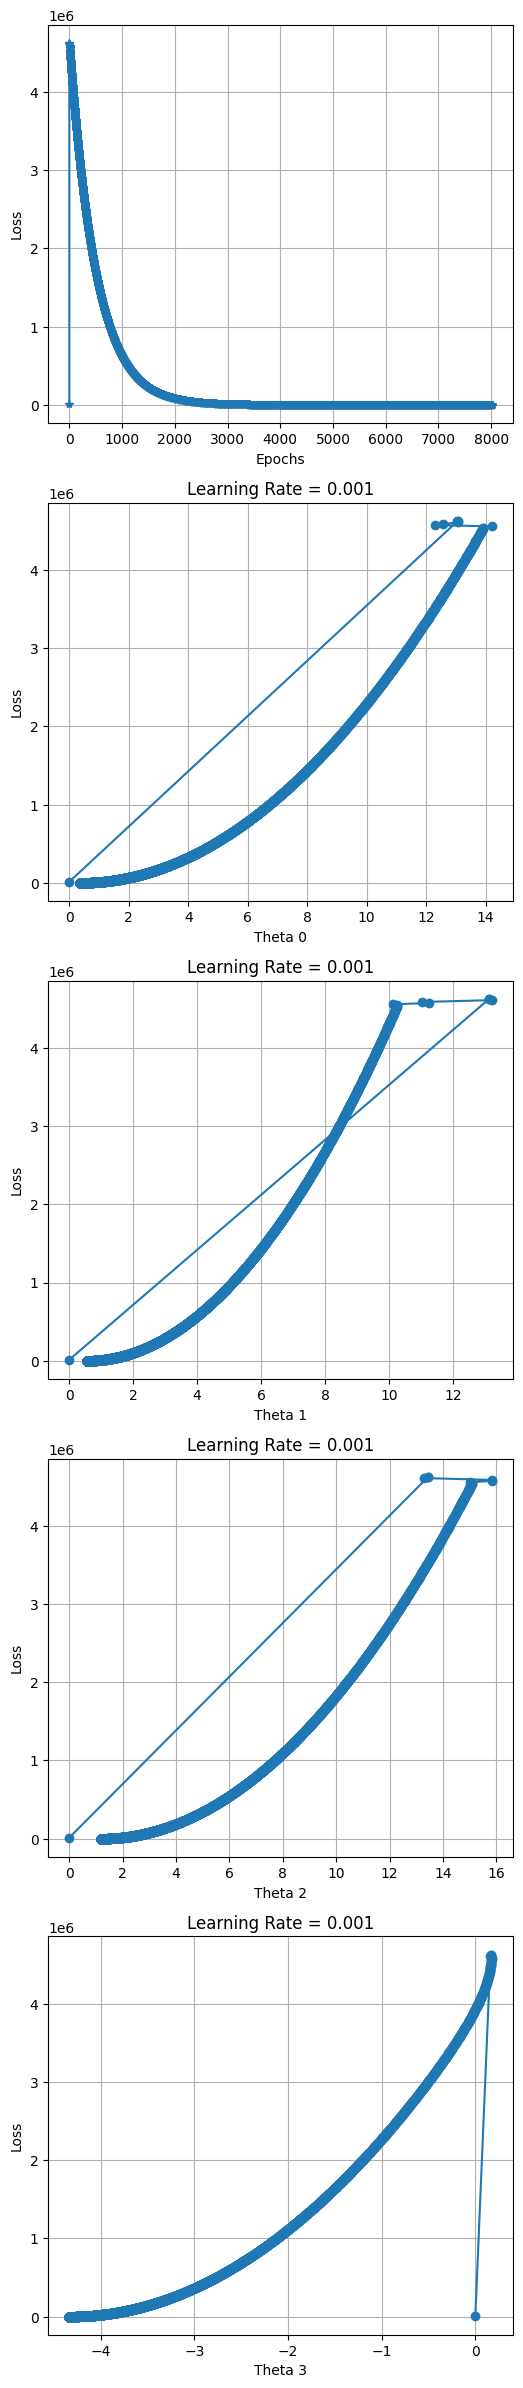

In [24]:
plots(X,y,finalPred['pred'], trainHistory['preds'], trainHistory['loss'], \
      trainHistory['weights'], 0.001)

In [25]:
r2_score(y, finalPred['pred'])

0.9878676756844609